<a href="https://colab.research.google.com/github/p65454/ds-section1-sprint3-new/blob/main/n132a_PCA_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment



# 1. Eigenstuff

주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix}

In [1]:
# 이 곳에 답안을 작성하시기 바랍니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
x = np.array([[9,4], [4,3]])
w, v = np.linalg.eig(x)
print('eigenvalue:',w)
print('eigenvector:',v)


eigenvalue: [11.  1.]
eigenvector: [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


# 2. PCA

Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요. <br>
  <http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [2]:
# 이 곳에 답안을 작성하시기 바랍니다.
import seaborn as sns
df = sns.load_dataset("penguins")

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [33]:
df_4 = df.drop(['species','island','sex'], axis = 1)
df_4.dropna(inplace=True)
df_4 = df_4.reset_index(drop=True)
df_4.isnull().sum()
df_4.shape

(333, 4)

In [5]:
df_4 = df_4.to_numpy()
df_4   # 순서대로 bill_length_mm / bill_depth_mm / flipper_length_mm / body_mass_g

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [34]:
##데이터 표준화
st_df_4 = (df_4 - np.mean(df_4, axis = 0)) / np.std(df_4, ddof=1, axis=0)
st_df_4

(333, 4)

In [7]:
#표준화한 데이터셋의 공분산행렬 구하기
cov = np.cov(st_df_4.T)
cov

array([[ 1.        , -0.23505287,  0.65618134,  0.59510982],
       [-0.23505287,  1.        , -0.58385122, -0.47191562],
       [ 0.65618134, -0.58385122,  1.        ,  0.87120177],
       [ 0.59510982, -0.47191562,  0.87120177,  1.        ]])

In [8]:
values, vectors = np.linalg.eig(cov)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Eigenvalues: 
 [2.75375512 0.77251675 0.36523591 0.10849222]

 Eigenvectors: 
 [[-0.45525033  0.59703114  0.64430115  0.14552311]
 [ 0.40033468  0.79776657 -0.41842724 -0.16798597]
 [-0.57601332  0.0022822  -0.23208397 -0.78379875]
 [-0.54835019  0.08436292 -0.59660012  0.57988211]]


In [14]:
# eigenvector는 크기가 1인 단위벡터 
print('pc1의 크기:', np.dot(vectors[:,0], vectors[:,0]))
print('pc2의 크기:', np.dot(vectors[:,1], vectors[:,1]))
print('pc3의 크기:', np.dot(vectors[:,2], vectors[:,2]))
print('pc4의 크기:', np.dot(vectors[:,3], vectors[:,3]))

pc1의 크기: 0.9999999999999999
pc2의 크기: 1.0
pc3의 크기: 1.0000000000000002
pc4의 크기: 1.0


In [18]:
# 데이터의 첫 row를 각각의 eigenvector에 projection하여 변환한 데이터 

pc_1 = np.dot(st_df_4[0], vectors[:,0])
pc_2 = np.dot(st_df_4[0], vectors[:,1])
pc_3 = np.dot(st_df_4[0], vectors[:,2])
pc_4 = np.dot(st_df_4[0], vectors[:,3])


print(pc_1, pc_2, pc_3, pc_4)

1.8407478244042088 0.04763242611220042 -0.2324535709275833 0.5231364672244055


In [16]:
Z = np.matmul(st_df_4, vectors)

print("\n Projected Data(Z): \n")
pd.DataFrame(Z, columns=['pc1', 'pc2','pc3','pc4'])


 Projected Data(Z): 



,pc1,pc2,pc3,pc4
0,1.840748,0.047632,-0.232454,0.523136
1,1.304850,-0.427722,-0.029519,0.401838
2,1.367178,-0.154250,0.198382,-0.527234
3,1.876078,-0.002045,-0.617691,-0.477678
4,1.908951,0.827996,-0.685580,-0.207124
...,...,...,...,...
337,-2.003500,-0.957506,0.364096,0.174573
338,-1.838193,-0.766591,0.229051,0.002901
339,-2.756703,0.288464,-0.427813,0.240364
340,-1.719844,-0.703239,-0.276574,0.338021


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z2 = scaler.fit_transform(st_df_4)
print("\n Standardized Data: \n", Z2)
print('Z2의 평균: ',Z2.mean())
print('Z2의 분산: ',Z2.var())
# 표준화한 데이터에 대하여 pca 시행 
pca = PCA(n_components=2) 
pca.fit(Z2)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z2)
print("\n Projected Data: \n", B)
B.shape


 Standardized Data: 
 [[-0.89604189  0.7807321  -1.42675157 -0.56847478]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608 ]
 ...
 [ 1.17338426 -0.74499437  1.50292796  1.91906927]
 [ 0.22108196 -1.20271231  0.78837197  1.23499466]
 [ 1.08181673 -0.54156417  0.85982757  1.48374906]]
Z2의 평균:  0.0
Z2의 분산:  1.0

 Eigenvectors: 
 [[ 0.45375317 -0.39904723  0.576825    0.54967471]
 [ 0.6001949   0.79616951  0.00578817  0.07646366]]

 Eigenvalues: 
 [2.75362487 0.7804609 ]

 Projected Data: 
 [[-1.85359302e+00  3.20693765e-02]
 [-1.31625406e+00 -4.43526765e-01]
 [-1.37660509e+00 -1.61230478e-01]
 [-1.88528838e+00 -1.23512351e-02]
 [-1.91998074e+00  8.17598126e-01]
 [-1.77302031e+00 -3.66222957e-01]
 [-8.18496250e-01  5.01243084e-01]
 [-1.79895773e+00 -2.45393945e-01]
 [-1.95614892e+00  9.98282895e-01]
 [-1.56952316e+00  5.78081948e-01]
 [-1.74800122e+00 -6.10244291e-01]
 [-1.57577371e+00  8.68357265e-02]
 [-8.04720190e-01  1.29355592e+00]
 [

(333, 2)

In [38]:
import seaborn as sns
result = pd.DataFrame(data=B, columns = ['PC1', 'PC2'])
ratio = pca.explained_variance_ratio_
print(ratio)
result

[0.68633893 0.19452929]


,PC1,PC2
0,-1.853593,0.032069
1,-1.316254,-0.443527
2,-1.376605,-0.161230
3,-1.885288,-0.012351
4,-1.919981,0.817598
...,...,...
328,1.997716,-0.976771
329,1.832651,-0.784510
330,2.751505,0.266556
331,1.713854,-0.725875


In [39]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.isnull().sum()
df.shape

(333, 7)

In [40]:
df2 = pd.concat([df,result],axis=1)
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,PC1,PC2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-1.853593,0.032069
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-1.316254,-0.443527
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-1.376605,-0.161230
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.885288,-0.012351
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-1.919981,0.817598
...,...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1.997716,-0.976771
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1.832651,-0.784510
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2.751505,0.266556
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1.713854,-0.725875


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   PC1                333 non-null    float64
 8   PC2                333 non-null    float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


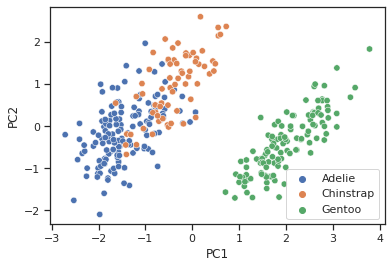

In [81]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,4
sns.set_style('ticks')
sns.scatterplot(x='PC1', y='PC2',hue="species",data=df2, s=40 , alpha=1);
plt.legend(loc = 'lower right')

# 🔥 도전과제 

위에서 PCA로 만든 데이터셋을 사용하여 "Scree Plot"을 만들어 보세요. 
90%의 내용을 설명하기 위해서, 몇 개의 PC를 사용해야 하나요?

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다.